<a href="https://colab.research.google.com/github/lhiwi/credit-risk-model/blob/task-4/notebooks/proxy-label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

proxy-target variable engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# drive mount if needed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Load data
features_path = '/content/drive/MyDrive/Data_5/Data/features_debug.csv'
feat = pd.read_csv(features_path)
print("Features shape:", feat.shape)
feat.head()

Features shape: (3742, 24)


,Recency,Frequency,Monetary,CustomerId,hour,day,month,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1.937605,-0.253459,-0.089524,CustomerId_1,16.000000,21.000000,11.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.937605,-0.253459,-0.089524,CustomerId_10,16.000000,21.000000,11.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.158882,-0.212186,-0.082011,CustomerId_1001,7.800000,16.000000,11.000000,2,0,3,...,0,0,0,2,3,0,0,0,5,0
3,-0.201408,-0.150278,-0.091448,CustomerId_1002,13.454545,14.727273,8.636364,5,0,6,...,0,0,0,6,5,0,0,0,6,5
4,-0.717722,-0.201868,-0.081422,CustomerId_1003,14.333333,1.000000,2.000000,3,0,3,...,0,0,0,2,4,0,0,0,6,0


scaling RFM

In [3]:
# If features include unscaled RFM, isolate and scale them
rfm_cols = ['Recency','Frequency','Monetary']
scaler = StandardScaler()
feat[rfm_cols] = scaler.fit_transform(feat[rfm_cols])

feat.head()

,Recency,Frequency,Monetary,CustomerId,hour,day,month,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1.937605,-0.253459,-0.089524,CustomerId_1,16.000000,21.000000,11.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.937605,-0.253459,-0.089524,CustomerId_10,16.000000,21.000000,11.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.158882,-0.212186,-0.082011,CustomerId_1001,7.800000,16.000000,11.000000,2,0,3,...,0,0,0,2,3,0,0,0,5,0
3,-0.201408,-0.150278,-0.091448,CustomerId_1002,13.454545,14.727273,8.636364,5,0,6,...,0,0,0,6,5,0,0,0,6,5
4,-0.717722,-0.201868,-0.081422,CustomerId_1003,14.333333,1.000000,2.000000,3,0,3,...,0,0,0,2,4,0,0,0,6,0


K-means clustering

In [4]:
# Choose 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
feat['cluster'] = kmeans.fit_predict(feat[rfm_cols])

# Inspect cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=rfm_cols)
print("Cluster centers (in original scale):")
display(centers)


Cluster centers (in original scale):


,Recency,Frequency,Monetary
0,1.106632,-0.184892,-0.060243
1,-0.090770,41.947752,38.536683
2,-0.699572,0.098587,0.021272


Identifying high-risk cluster

In [5]:
# Determine which cluster has highest Recency and lowest Frequency+Monetary
summary = feat.groupby('cluster')[rfm_cols].mean().reset_index()
# Heuristic: cluster with max Recency
high_risk_cluster = summary.loc[summary.Recency.idxmax(), 'cluster']
print("High-risk cluster is:", high_risk_cluster)


High-risk cluster is: 0


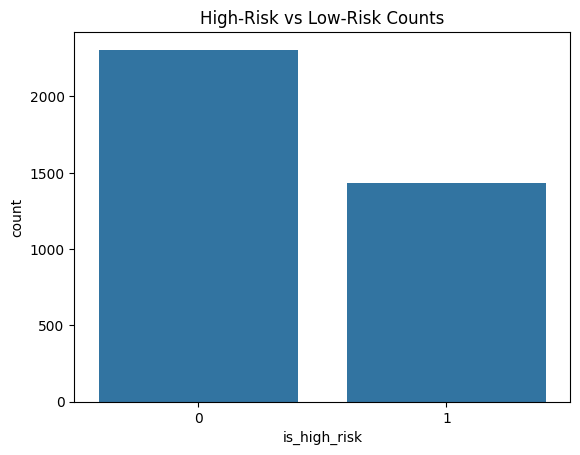

In [6]:
feat['is_high_risk'] = (feat['cluster'] == high_risk_cluster).astype(int)
sns.countplot(x='is_high_risk', data=feat)
plt.title("High-Risk vs Low-Risk Counts")
plt.show()

In [7]:
output_path = '/content/drive/MyDrive/Data_5/Data/features_with_label.csv'
feat.to_csv(output_path, index=False)
print("Saved labeled features to:", output_path)

Saved labeled features to: /content/drive/MyDrive/Data_5/Data/features_with_label.csv
